/home/p_aragao/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


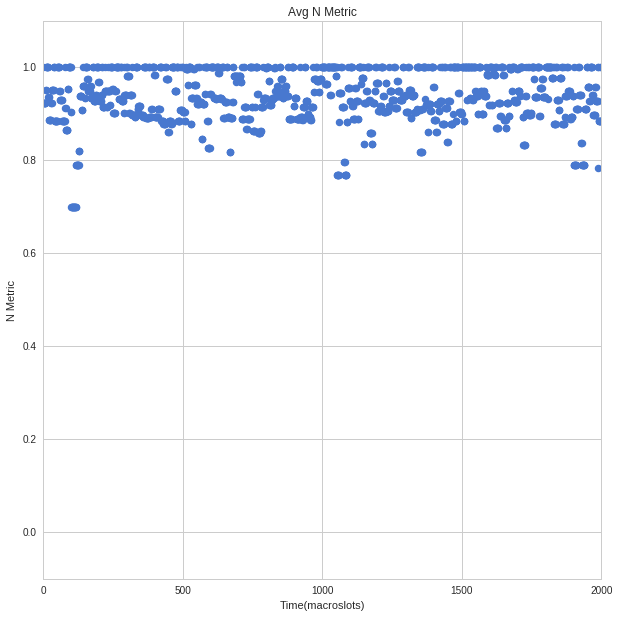

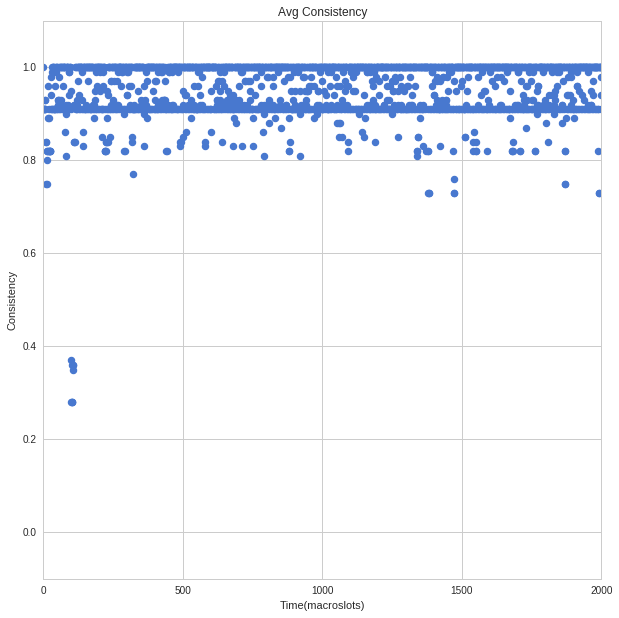

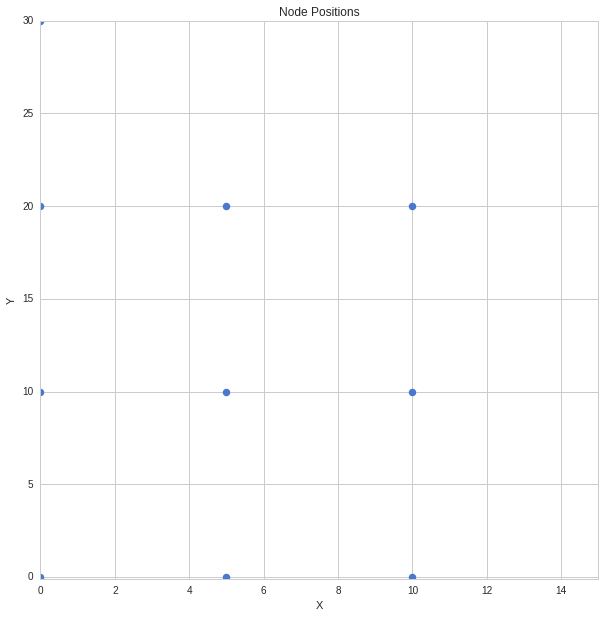

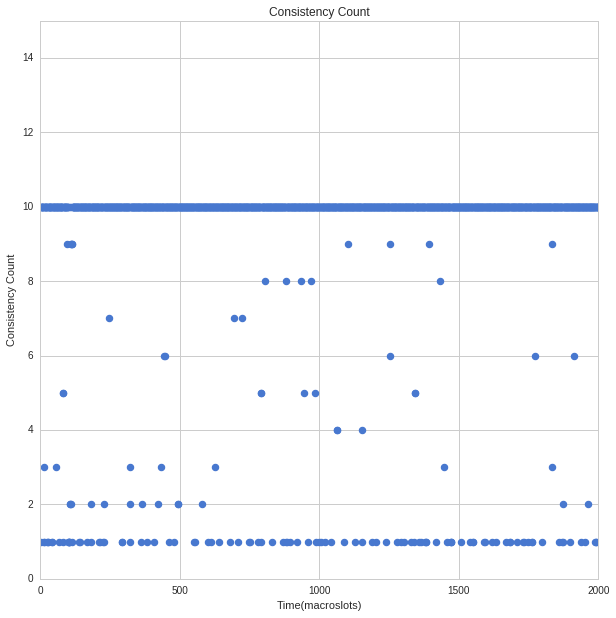

In [1]:
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy
def getValues(file):
    y = []
    with open(file) as f:
        data = f.readlines()
        for line in data:
            x_y = line.split()
            if(len(line) >= 2):
                y_e = x_y[1]
                y.append(y_e)
    return y

def histogram(file, title, xlabel, ylabel, nbins):
    values = np.array(map(float, getValues(file)))
    weights = np.ones_like(values)/float(len(values))
    plt.hist(values, weights=weights, bins=nbins, histtype='stepfilled', normed=False, color='b', label= ylabel)
    plt.title(title + " Histogram")     
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

sns.set_style("whitegrid")

blue, = sns.color_palette("muted", 1)
class plotter:
    def __init__(self, x_i, x_e, y_i, y_e):
        self.yrange = (y_i, y_e)
        self.xrange = (x_i, x_e)
    def plot(self, file, title, xlabel, ylabel):
        x = []
        y = []
        fig = plt.figure(figsize=(10, 10))
        ax1 = fig.add_subplot(111)
        ax1.set_title(title)
        ax1.set_xlabel(xlabel)

        with open(file) as f:
            data = f.readlines()
            for line in data:
                #print line
                #print line.split()
                x_y = line.split()
                if(len(line) >= 2):
                    x_e = x_y[0]
                    y_e = x_y[1]
                    x.append(x_e)
                    y.append(y_e)
            ax1.set_ylabel(ylabel)
            leg = ax1.legend()
            ax1.scatter(x,y, color=blue, lw=3, label='data values')
            #ax1.fill_between(x, 0, y, alpha=.3)
            ax1.set(xlim = (self.xrange[0], self.xrange[1]), ylim= (self.yrange[0], self.yrange[1]))
            fig.savefig(file.split('.')[0] + '.png')
            plt.show()
            
p = plotter(0,2000,-0.1, 1.1)
p.plot("avg-nmetric.dat", "Avg N Metric", "Time(macroslots)", "N Metric")
p.plot ("avg-consistency.dat", "Avg Consistency", "Time(macroslots)", "Consistency")
p = plotter(0,15,-0.1, 30)
p.plot("network-position.dat", "Node Positions", "X", "Y")
p = plotter(0,2000,0, 15)

p.plot ("consistency-count.dat", "Consistency Count", "Time(macroslots)", "Consistency Count")
#p.hist("avg-nmetric.dat", "Avg N Metric", "Time(macroslots)", "N Metric")



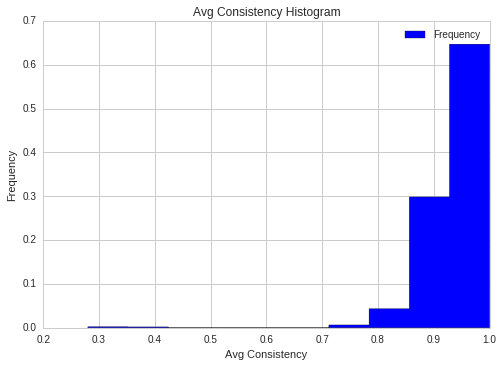

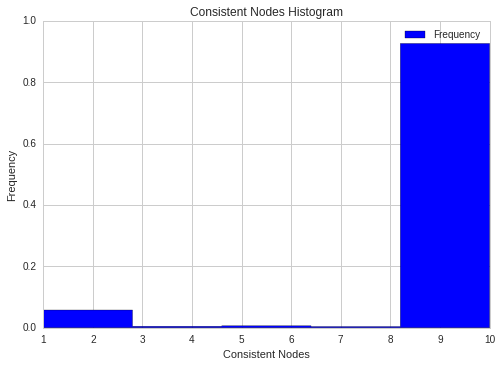

In [2]:

import matplotlib.pyplot as plt
   
avg_consistency = np.array(map(float, getValues("avg-consistency.dat"))) 
consistency_count = np.array(map(float, getValues("consistency-count.dat")))

histogram("avg-consistency.dat", "Avg Consistency", "Avg Consistency", "Frequency", 10)
histogram("consistency-count.dat", "Consistent Nodes", "Consistent Nodes", "Frequency", 5)